# Testing geohashlib in a notebook


In [1]:
import geohashlib as g
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
%matplotlib inline

## David's Example should be dr5rustf

A slight nuance to this is that the coordinates provided were in reverse order of what this function takes. In future cases, it should [longitude,latitude] as opposed to [latitude,longitude].

In [2]:
david_example = """
{
  "type":"Polygon",
  "coordinates":[[[-73.9741,40.7626], 
                  [-73.9736,40.7626], 
                  [-73.9737,40.7622], 
                  [-73.9740,40.7622]]]
}
"""
davids_polygon = g.load_from_json(david_example)
print("Geohash is:")
print(g.shape2geohash(davids_polygon, 8, 'inside'))

Geohash is:
['dr5rustf']


### The 8 surrounding geohashes

In [3]:
g.neighbors('dr5rustf')

['dr5rust9',
 'dr5rustd',
 'dr5ruste',
 'dr5rustc',
 'dr5rustg',
 'dr5rusw1',
 'dr5rusw4',
 'dr5rusw5']

Trying David's neighbors example.

In [4]:
g.neighbors('dr5ruddr')

['dr5ruddn',
 'dr5ruddp',
 'dr5rudf0',
 'dr5ruddq',
 'dr5rudf2',
 'dr5ruddw',
 'dr5ruddx',
 'dr5rudf8']

### Create an example set of geohashes

In [5]:
example_set = g.shape2geohash(davids_polygon, 9, 'inside')
print(example_set)

['dr5rustc3', 'dr5rustc6', 'dr5rustc7', 'dr5rustck', 'dr5rustcm', 'dr5rustcq', 'dr5rustcr', 'dr5rustc9', 'dr5rustcd', 'dr5rustce', 'dr5rustcs', 'dr5rustct', 'dr5rustcw', 'dr5rustcx', 'dr5rustcc', 'dr5rustcf', 'dr5rustcg', 'dr5rustcu', 'dr5rustcv', 'dr5rustcy', 'dr5rustcz', 'dr5rustf0', 'dr5rustf1', 'dr5rustf4', 'dr5rustf5', 'dr5rustfh', 'dr5rustfj', 'dr5rustfn', 'dr5rustfp', 'dr5rustf2', 'dr5rustf3', 'dr5rustf6', 'dr5rustf7', 'dr5rustfk', 'dr5rustfm', 'dr5rustfq', 'dr5rustfr', 'dr5rusw42', 'dr5rustf8', 'dr5rustf9', 'dr5rustfd', 'dr5rustfe', 'dr5rustfs', 'dr5rustft', 'dr5rustfw', 'dr5rustfx', 'dr5rusw48', 'dr5rustfb', 'dr5rustfc', 'dr5rustff', 'dr5rustfg', 'dr5rustfu', 'dr5rustfv', 'dr5rustfy', 'dr5rustfz', 'dr5rusw4b', 'dr5rustep', 'dr5rustg0', 'dr5rustg1', 'dr5rustg4', 'dr5rustg5', 'dr5rustgh', 'dr5rustgj', 'dr5rustgn', 'dr5rustgp', 'dr5rusw50']


Function that turns geohashes into coordinates for the Polygon object

In [6]:
shape = g.geohash2shape(example_set)
shape

{"coordinates": [[40.76225996017456, -73.9739727973938], [40.76225996017456, -73.97371530532837], [40.762388706207275, -73.97401571273804], [40.762431621551514, -73.97367238998413], [40.76256036758423, -73.97405862808228], [40.76256036758423, -73.97367238998413]], "type": "Polygon"}

In [7]:
shape.__class__

geojson.geometry.Polygon

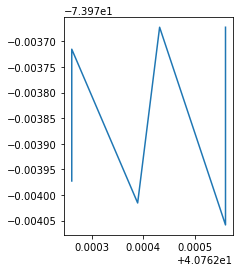

In [8]:
coords = shape['coordinates']
x = [i for i,j in coords]
y = [j for i,j in coords]
fig = plt.figure()
ax = fig.gca()
ax.plot(x,y)
ax.axis('scaled')
plt.show()